In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [28]:
df = pd.read_csv('Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [29]:
X = df.drop('Sales', axis=1)
y = df.Sales.values

In [30]:
lm = LinearRegression().fit(X,y)

In [31]:
print(f'{"Model Coefficients":>9}')
for col, coef in zip(X.columns, lm.coef_):
    print(f'{col:>9}: {coef:>6.3f}')
print(f'\nR^2: {lm.score(X,y):.4}')

Model Coefficients
       TV:  0.046
    Radio:  0.189
Newspaper: -0.001

R^2: 0.8972


In [32]:
df *= 1000
df.head()

,TV,Radio,Newspaper,Sales
1,230100.0,37800.0,69200.0,22100.0
2,44500.0,39300.0,45100.0,10400.0
3,17200.0,45900.0,69300.0,9300.0
4,151500.0,41300.0,58500.0,18500.0
5,180800.0,10800.0,58400.0,12900.0


In [33]:
# refit a new regression model on the scaled data
X = df.drop('Sales', axis=1)
y = df.Sales.values
lm = LinearRegression().fit(X,y)

print(f'{"Model Coefficients":>9}')
for col, coef in zip(X.columns, lm.coef_):
    print(f'{col:>9}: {coef:>6.3f}')
print(f'\nR^2: {lm.score(X,y):.4}')

Model Coefficients
       TV:  0.046
    Radio:  0.189
Newspaper: -0.001

R^2: 0.8972


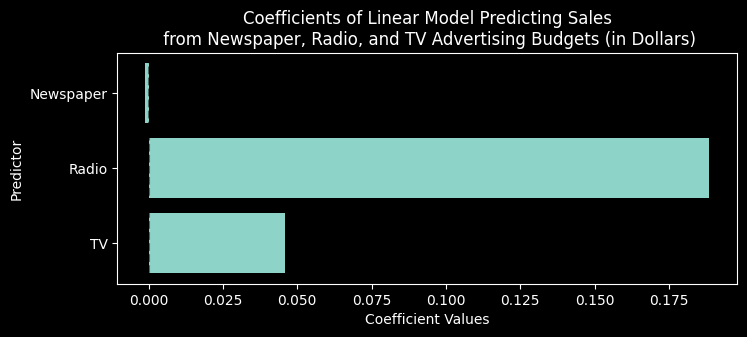

In [34]:
plt.figure(figsize=(8,3))
# column names to be displayed on the y-axis
cols = X.columns
# coeffient values from our fitted model (the intercept is not included)
coefs = lm.coef_
# create the horizontal barplot
plt.barh(cols, coefs)
# dotted, semi-transparent, black vertical line at zero
plt.axvline(0, c='k', ls='--', alpha=0.5)
# always label your axes
plt.ylabel('Predictor')
plt.xlabel('Coefficient Values')
# and create an informative title
plt.title('Coefficients of Linear Model Predicting Sales\n from Newspaper, '\
            'Radio, and TV Advertising Budgets (in Dollars)');

In [35]:
# create a new DataFrame to store the converted budgets
X2 = pd.DataFrame()
X2['TV (Rupee)'] = 200 * df['TV'] # convert to Sri Lankan Rupee
X2['Radio (Won)'] = 1175 * df['Radio'] # convert to South Korean Won
X2['Newspaper (Cedi)'] = 6 * df['Newspaper'] # Convert to Ghanaian Cedi

In [36]:
# we can use our original y as we have not converted the units for Sales
lm2 = LinearRegression().fit(X2,y)

In [37]:
print(f'{"Model Coefficients":>16}')
for col, coef in zip(X2.columns, lm2.coef_):
    print(f'{col:>16}: {coef:>8.5f}')
print(f'\nR^2: {lm2.score(X2,y):.4}')

Model Coefficients
      TV (Rupee):  0.00023
     Radio (Won):  0.00016
Newspaper (Cedi): -0.00017

R^2: 0.8972


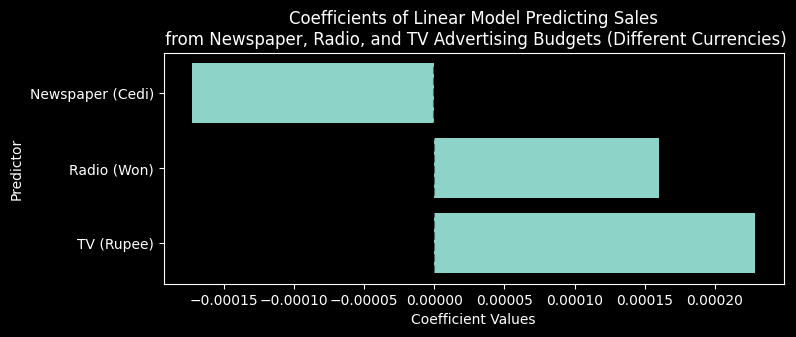

In [38]:
plt.figure(figsize=(8,3))
plt.barh(X2.columns, lm2.coef_)
plt.axvline(0, c='k', ls='--', alpha=0.5)
plt.ylabel('Predictor')
plt.xlabel('Coefficient Values')
plt.title('Coefficients of Linear Model Predicting Sales\n from Newspaper, '\
            'Radio, and TV Advertising Budgets (Different Currencies)');


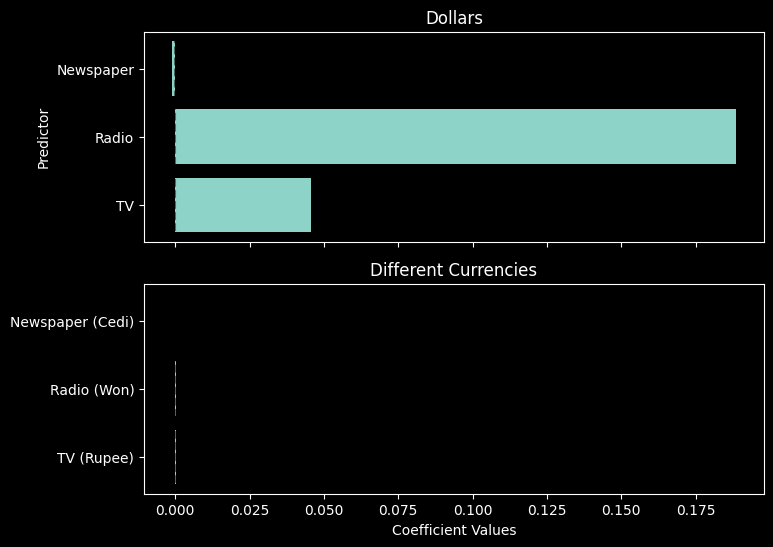

In [39]:
fig, axes = plt.subplots(2,1, figsize=(8,6), sharex=True)

axes[0].barh(X.columns, lm.coef_)
axes[0].set_title('Dollars');
axes[1].barh(X2.columns, lm2.coef_)
axes[1].set_title('Different Currencies')
for ax in axes:
    ax.axvline(0, c='k', ls='--', alpha=0.5)
axes[0].set_ylabel('Predictor')
axes[1].set_xlabel('Coefficient Values');
